## 카트폴 스케이팅

> **문제**: 피터가 늑대에게서 도망치려면 늑대보다 더 빨리 움직일 수 있어야 합니다. 피터가 스케이트를 배우고, 특히 균형을 유지하는 방법을 Q-러닝을 통해 알아보겠습니다.

먼저 gym을 설치하고 필요한 라이브러리를 가져옵니다:


In [1]:
#code block 1

## 카트폴 환경 생성


In [ ]:
#code block 2

환경이 어떻게 작동하는지 확인하기 위해 100단계 동안 짧은 시뮬레이션을 실행해 봅시다.


In [ ]:
#code block 3

시뮬레이션 중에는 어떻게 행동할지 결정하기 위해 관찰을 얻어야 합니다. 실제로 `step` 함수는 현재 관찰, 보상 함수, 그리고 시뮬레이션을 계속 진행할지 여부를 나타내는 `done` 플래그를 반환합니다:


In [ ]:
#code block 4

우리는 이러한 숫자들의 최소값과 최대값을 얻을 수 있습니다:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

다른 구간화를 사용하여 구간화 방법도 탐구해 봅시다:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


이제 짧은 시뮬레이션을 실행하고 해당 이산 환경 값을 관찰해 봅시다.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


## Q-테이블 구조


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


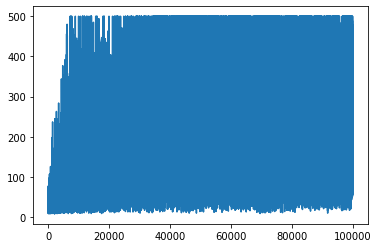

In [20]:
plt.plot(rewards)

이 그래프에서는 아무것도 알 수 없습니다. 왜냐하면 확률적 훈련 과정의 특성상 훈련 세션의 길이가 크게 달라지기 때문입니다. 이 그래프를 더 잘 이해하기 위해서는 실험 시리즈에 대해 **이동 평균**을 계산할 수 있습니다. 예를 들어 100번이라고 가정해 봅시다. 이는 `np.convolve`를 사용하여 편리하게 수행할 수 있습니다.


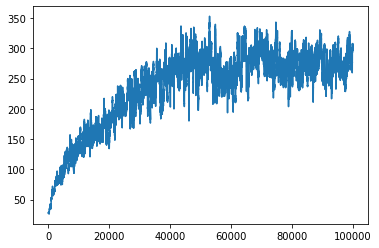

In [22]:
#code block 12

## 하이퍼파라미터를 변경하며 결과 확인하기

이제 훈련된 모델이 실제로 어떻게 작동하는지 보는 것이 흥미로울 것입니다. 시뮬레이션을 실행해 보겠습니다. 훈련 중과 동일한 행동 선택 전략을 따를 것입니다. 즉, Q-테이블의 확률 분포에 따라 샘플링하는 방식입니다:


In [23]:
# code block 13

## 결과를 애니메이션 GIF로 저장하기

친구들에게 감동을 주고 싶다면, 균형 막대의 애니메이션 GIF 이미지를 보내는 것도 좋은 방법입니다. 이를 위해 `env.render`를 호출하여 이미지 프레임을 생성한 다음, PIL 라이브러리를 사용해 이를 애니메이션 GIF로 저장할 수 있습니다:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**면책 조항**:  
이 문서는 AI 번역 서비스 [Co-op Translator](https://github.com/Azure/co-op-translator)를 사용하여 번역되었습니다. 정확성을 위해 최선을 다하고 있지만, 자동 번역에는 오류나 부정확성이 포함될 수 있습니다. 원본 문서를 해당 언어로 작성된 상태에서 권위 있는 자료로 간주해야 합니다. 중요한 정보의 경우, 전문적인 인간 번역을 권장합니다. 이 번역을 사용함으로 인해 발생하는 오해나 잘못된 해석에 대해 책임을 지지 않습니다.
